<a href="https://colab.research.google.com/github/g7mack/Machine-Learning-Engineering/blob/main/MLE_HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MANE 4961: Machine Learning for Engineering HW 4**

Gavin MacKenzie: Solutions (662020762)

## 1) Construct a fully connected neural network model for classifying the CIFAR-10 dataset. Use a 70%-30% split for training and validation data. Visualize the data by plotting an image from each category from the CIFAR-10 dataset. Demonstrate the tuning of the hyperparameters of the neural network via grid-search. Calculate and plot the training and validation losses of the tuned network. Calculate and plot the training and validation accuracies of the tuned network.

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_val, y_val = x_test, y_test

# normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_val = x_val.astype('float32') / 255.0

# one-hot encode labels
num_classes = 10
y_train_one_hot = to_categorical(y_train, num_classes)
y_val_one_hot = to_categorical(y_val, num_classes)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


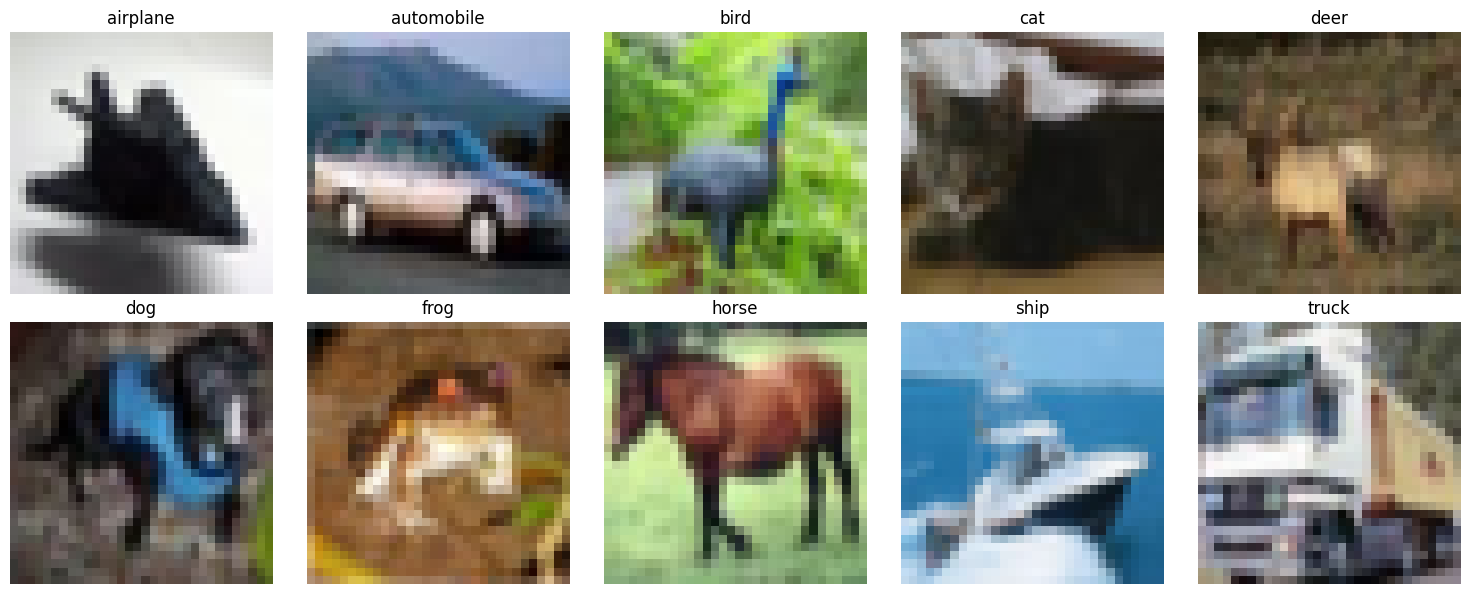

In [2]:
import matplotlib.pyplot as plt

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.ravel()

# display one image from each class
for i in range(num_classes):
    img_index = list(y_train).index(i)

    axes[i].imshow(x_train[img_index])
    axes[i].set_title(class_names[i])
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [9]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Input, Dense
from sklearn.model_selection import ParameterGrid
import numpy as np

# hyperparameters to tune
param_grid = {
    'dense_units': [64, 128, 256],
    'learning_rate': [0.001, 0.01, 0.1],
    'batch_size': [32, 64, 128],
    'epochs': [10]
}

input_shape = x_train.shape[1:]

# function to create model
def create_model(dense_units=128, learning_rate=0.001):
    model = Sequential([
        Flatten(input_shape=input_shape),
        Dense(dense_units, activation='relu'),
        Dense(int(dense_units/2), activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model


best_accuracy = -1
best_params = None
results = []

# all combinations of hyperparameters
param_combinations = ParameterGrid(param_grid)

for params in param_combinations:
    model = create_model(dense_units=params['dense_units'], learning_rate=params['learning_rate'])

    history = model.fit(x_train, y_train_one_hot,
                        batch_size=params['batch_size'],
                        epochs=params['epochs'],
                        verbose=0,
                        validation_data=(x_val, y_val_one_hot))

    # evaluate on validation data
    loss, accuracy = model.evaluate(x_val, y_val_one_hot, verbose=0)
    print(f"Accuracy with {params}: {accuracy:.4f}")

    results.append({'params': params, 'accuracy': accuracy, 'loss': loss})

    # check if best model
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

print("\nGrid Search Complete.")
print(f"Best Validation Accuracy: {best_accuracy:.4f}")
print(f"Best Hyperparameters: {best_params}")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Accuracy with {'batch_size': 32, 'dense_units': 64, 'epochs': 10, 'learning_rate': 0.001}: 0.4497
Accuracy with {'batch_size': 32, 'dense_units': 64, 'epochs': 10, 'learning_rate': 0.01}: 0.1000
Accuracy with {'batch_size': 32, 'dense_units': 64, 'epochs': 10, 'learning_rate': 0.1}: 0.1000
Accuracy with {'batch_size': 32, 'dense_units': 128, 'epochs': 10, 'learning_rate': 0.001}: 0.4658
Accuracy with {'batch_size': 32, 'dense_units': 128, 'epochs': 10, 'learning_rate': 0.01}: 0.1000
Accuracy with {'batch_size': 32, 'dense_units': 128, 'epochs': 10, 'learning_rate': 0.1}: 0.1000
Accuracy with {'batch_size': 32, 'dense_units': 256, 'epochs': 10, 'learning_rate': 0.001}: 0.4856
Accuracy with {'batch_size': 32, 'dense_units': 256, 'epochs': 10, 'learning_rate': 0.01}: 0.2255
Accuracy with {'batch_size': 32, 'dense_units': 256, 'epochs': 10, 'learning_rate': 0.1}: 0.1000
Accuracy with {'batch_size': 64, 'dense_units': 64, 'epochs': 10, 'learning_rate': 0.001}: 0.4403
Accuracy with {'batch_s

In [10]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from sklearn.model_selection import ParameterGrid

# model with the best hyperparameters
best_model = Sequential([
    Input(shape=input_shape),
    Flatten(),
    Dense(best_params['dense_units'], activation='relu'),
    Dense(int(best_params['dense_units']/2), activation='relu'),
    Dense(num_classes, activation='softmax')
])

optimizer = Adam(learning_rate=best_params['learning_rate'])
best_model.compile(optimizer=optimizer,
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

# train model
history = best_model.fit(x_train, y_train_one_hot,
                         batch_size=best_params['batch_size'],
                         epochs=best_params['epochs'],
                         validation_data=(x_val, y_val_one_hot))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.2761 - loss: 2.0028 - val_accuracy: 0.3822 - val_loss: 1.7396
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.3905 - loss: 1.7068 - val_accuracy: 0.4131 - val_loss: 1.6339
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.4250 - loss: 1.6120 - val_accuracy: 0.4255 - val_loss: 1.6106
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.4507 - loss: 1.5471 - val_accuracy: 0.4610 - val_loss: 1.5172
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.4631 - loss: 1.5075 - val_accuracy: 0.4693 - val_loss: 1.5048
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.4764 - loss: 1.4734 - val_accuracy: 0.4621 - val_loss: 1.5097
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.4807 - loss: 1.4495 - val_accuracy: 0.4805 - val_loss: 1.4654
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.4929 - loss: 1.4267 - 

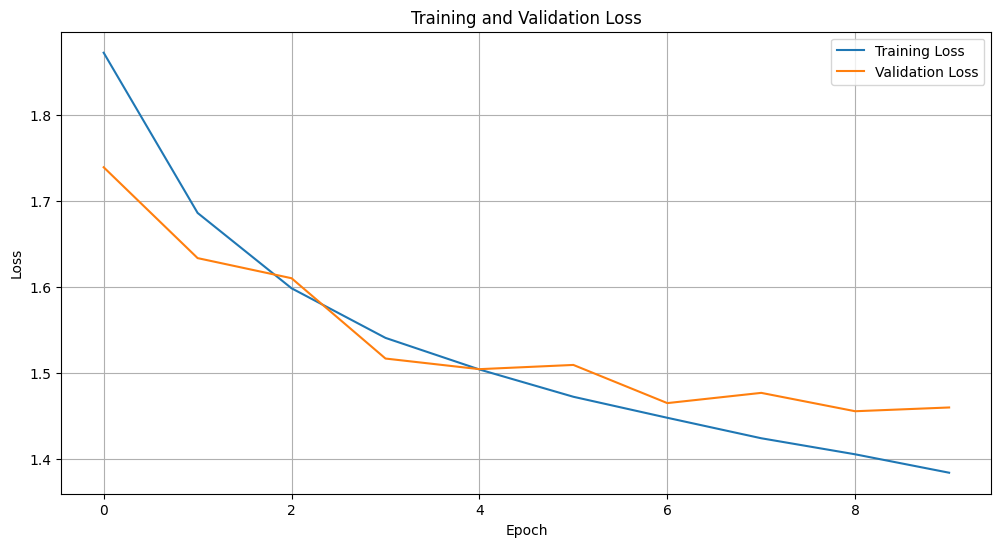

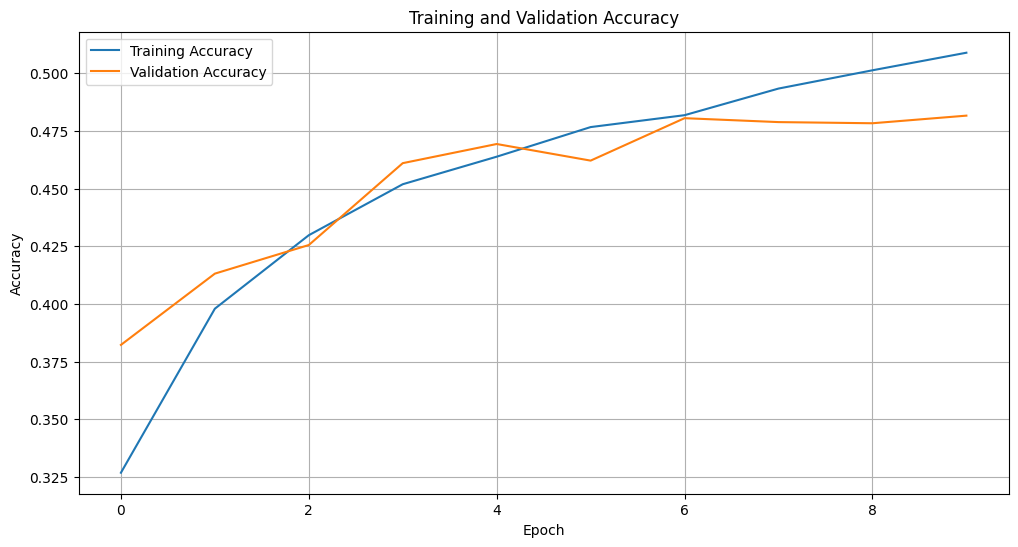

Final Validation Loss: 1.4603
Final Validation Accuracy: 0.4816


In [11]:
import matplotlib.pyplot as plt

# plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# evaluate model on the validation set
loss, accuracy = best_model.evaluate(x_val, y_val_one_hot, verbose=0)
print(f"Final Validation Loss: {loss:.4f}")
print(f"Final Validation Accuracy: {accuracy:.4f}")

## 2) Obtain the NASA airfoil self-noise dataset from UCI machine learning dataset repository. The dataset describes different size NACA 0012 airfoils at various wind tunnel speeds and angles of attack. The span of the airfoil and the observer position were the same in all of the experiments. The following attributes were measured: Frequency, in Hz, Angle of attack, in degrees, Chord length, in meters, Free-stream velocity, in meters per second, Suction side displacement thickness, in meters. The only measured output was: Scaled sound pressure level, in decibels. Visualize the dataset. Construct a fully connected neural network model for estimating scaled sound pressure level, in decibels, from the attributes by choosing a 70%-30% split. Calculate the coefficient of determination.

In [12]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00291/airfoil_self_noise.dat"

column_names = [
    "frequency",
    "angle_of_attack",
    "chord_length",
    "free_stream_velocity",
    "suction_side_displacement_thickness",
    "scaled_sound_pressure_level"
]

df = pd.read_csv(url, sep='\t', header=None, names=column_names)
print("First 5 rows of the dataset:")
display(df)

First 5 rows of the dataset:


,frequency,angle_of_attack,chord_length,free_stream_velocity,suction_side_displacement_thickness,scaled_sound_pressure_level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,5000,15.6,0.1016,39.6,0.052849,106.224


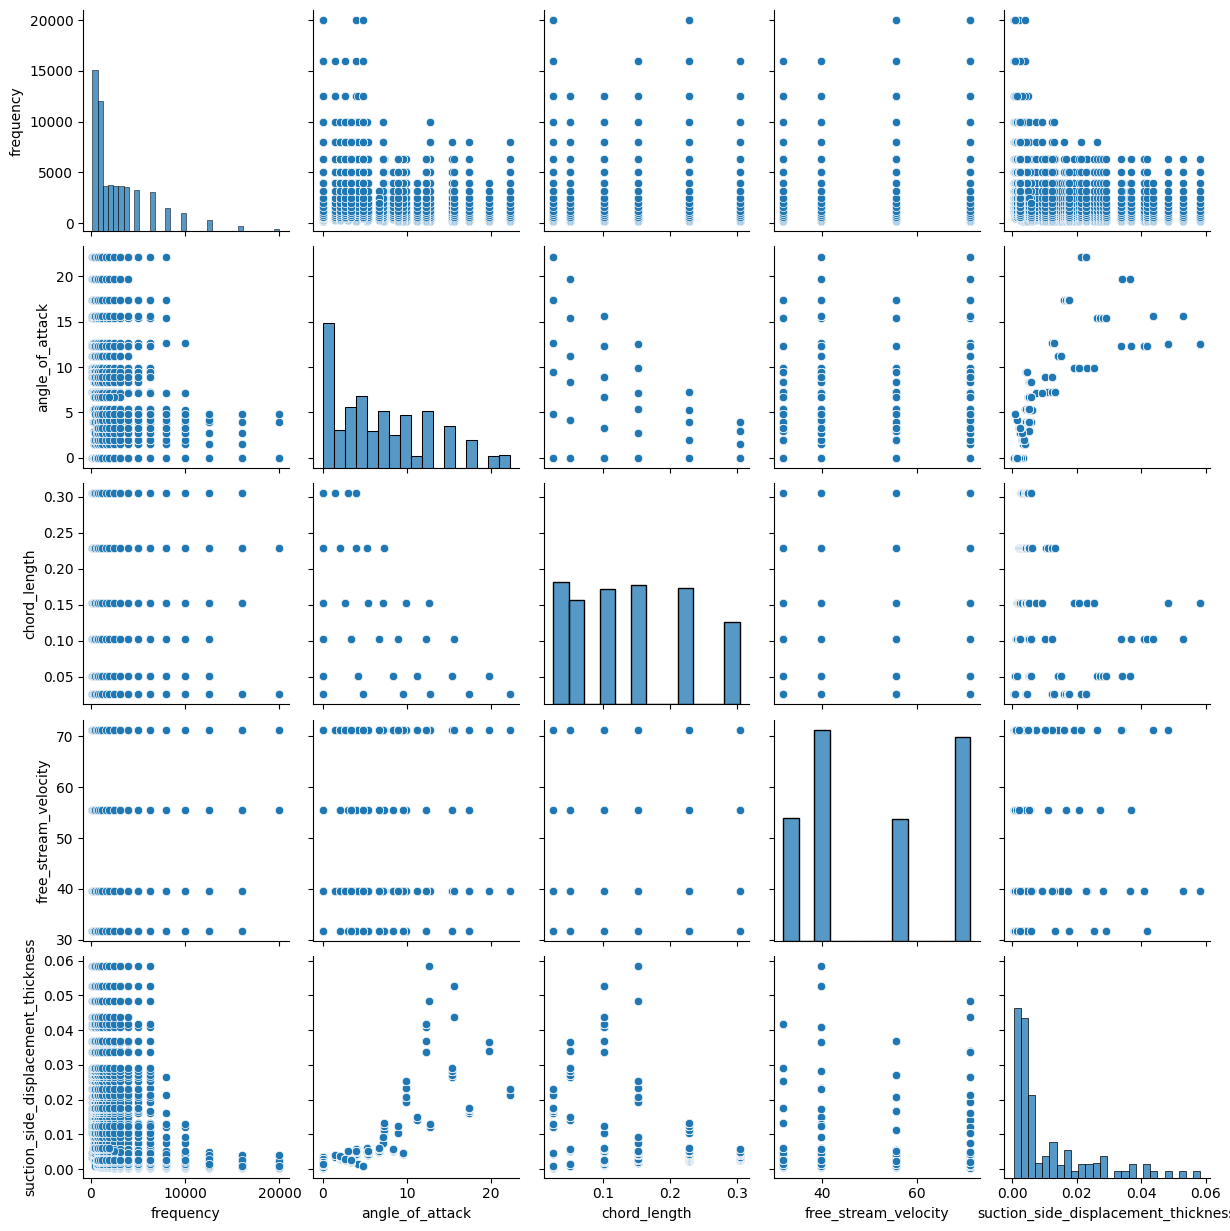

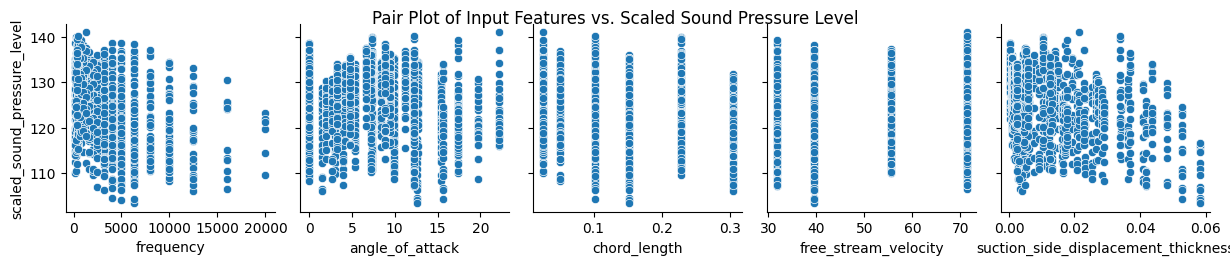

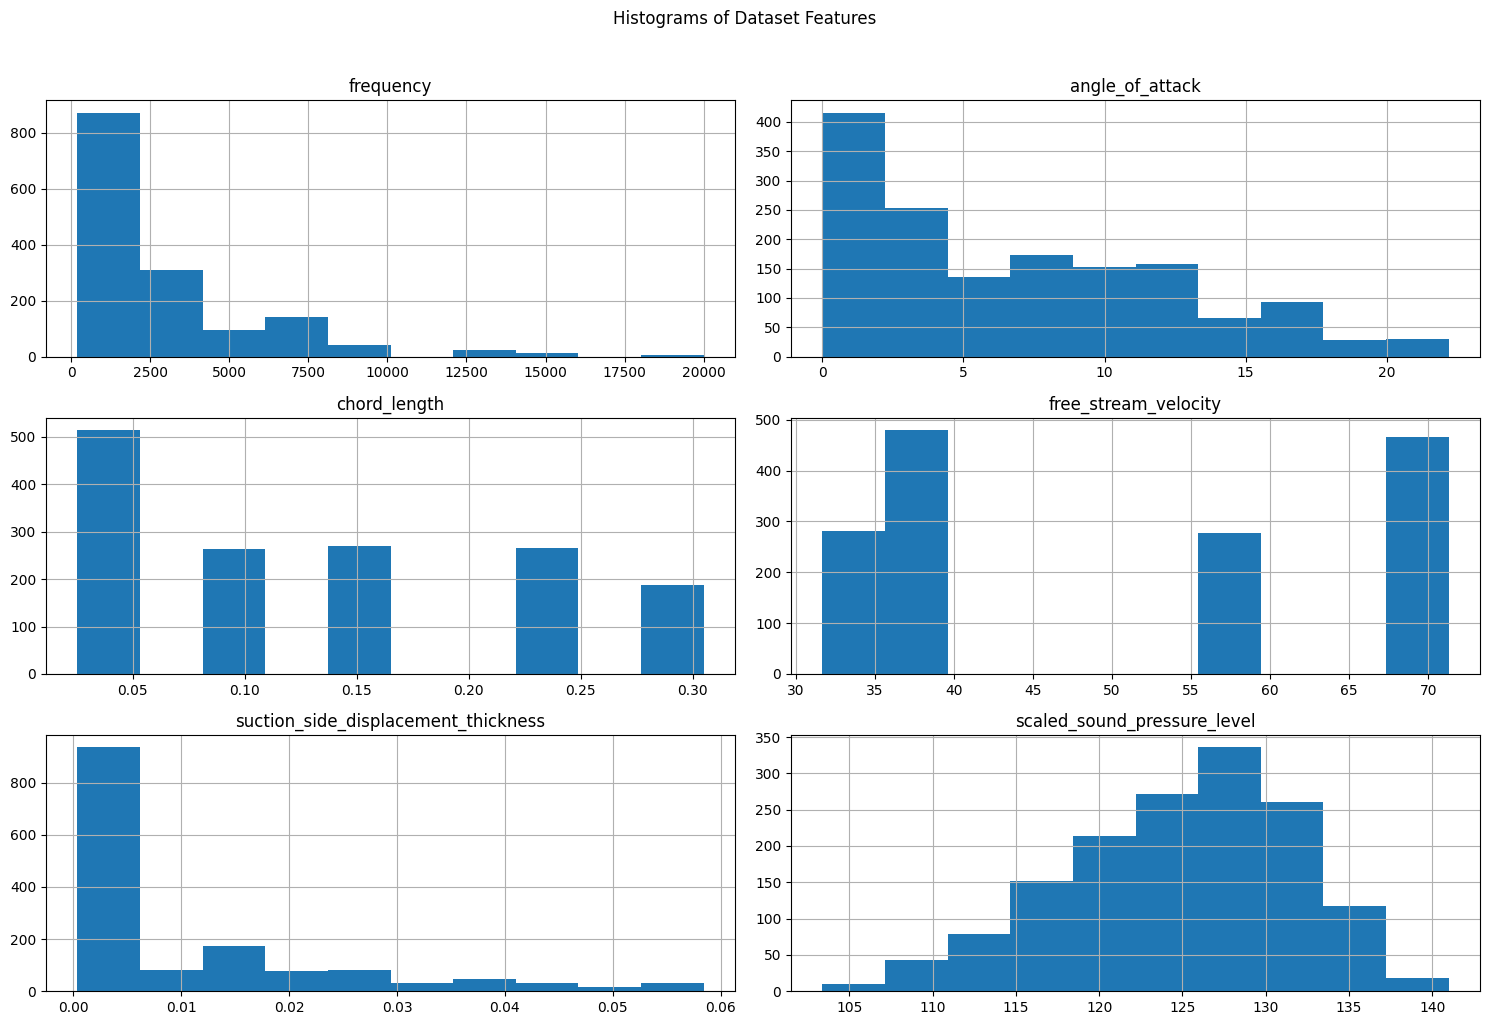

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the relationships between input features and the target variable using a pair plot
sns.pairplot(df.drop('scaled_sound_pressure_level',axis=1))
sns.pairplot(df, y_vars=['scaled_sound_pressure_level'], x_vars=column_names[:-1])
plt.suptitle('Pair Plot of Input Features vs. Scaled Sound Pressure Level', y=1.02)
plt.show()

# Visualize the distributions of each feature and the target variable using histograms
df.hist(figsize=(15, 10))
plt.suptitle('Histograms of Dataset Features', y=1.02)
plt.tight_layout()
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input


X = df.drop('scaled_sound_pressure_level', axis=1)
y = df['scaled_sound_pressure_level']

# split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


input_shape = X_train_scaled.shape[1]

model = Sequential([
    Input(shape=(input_shape,)),
    Dense(64, activation='sigmoid'),
    Dense(32, activation='sigmoid'),
    Dense(1, activation='linear')
])

model.compile(optimizer='sgd',
              loss='mean_squared_error',
              metrics=['mean_absolute_error'])

history = model.fit(X_train_scaled, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_data=(X_test_scaled, y_test))

Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2984.7708 - mean_absolute_error: 33.1371 - val_loss: 47.4102 - val_mean_absolute_error: 5.6876
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 49.1532 - mean_absolute_error: 5.7824 - val_loss: 46.8795 - val_mean_absolute_error: 5.5334
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 48.7831 - mean_absolute_error: 5.6283 - val_loss: 44.1709 - val_mean_absolute_error: 5.3790
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 40.7210 - mean_absolute_error: 5.1543 - val_loss: 38.0457 - val_mean_absolute_error: 5.0941
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 34.7272 - mean_absolute_error: 4.8288 - val_loss: 30.3447 - val_mean_absolute_error: 4.4658
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 28.6096 - mean_absolute_error: 4.2513 - val_loss: 24.2588 - val_mean_absolute_error: 3.8651
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 23.4219 - mean_absolute_error: 3

In [15]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)

print(f"Coefficient of Determination (R-squared): {r2:.4f}")

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Coefficient of Determination (R-squared): 0.8165


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


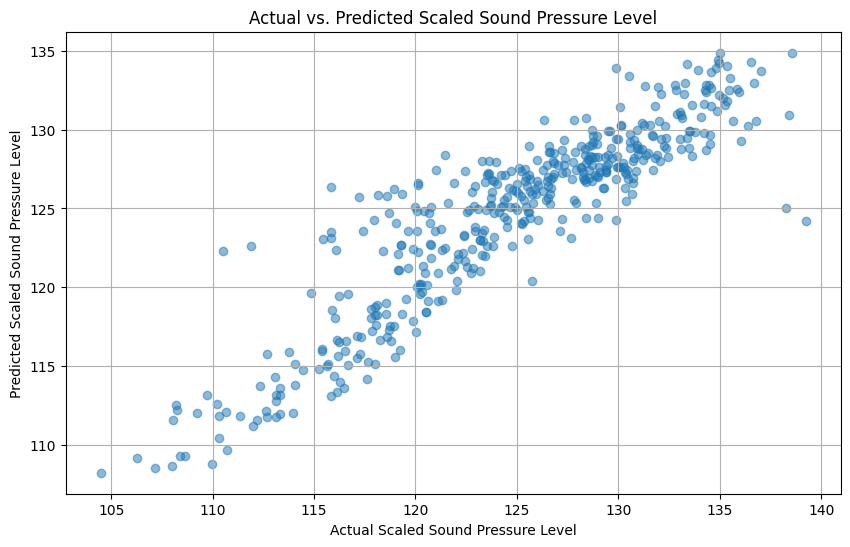

In [16]:
import matplotlib.pyplot as plt

# Make predictions on the test data
y_pred = model.predict(X_test_scaled)

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Scaled Sound Pressure Level")
plt.ylabel("Predicted Scaled Sound Pressure Level")
plt.title("Actual vs. Predicted Scaled Sound Pressure Level")
plt.grid(True)
plt.show()